In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid

# from lab_utils_softmax import plt_softmax

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

Text(0.5, 1.0, '2')

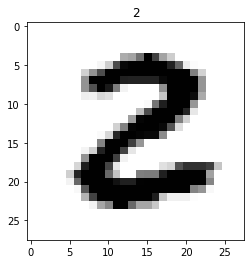

In [4]:
plt.imshow(x_train[25], cmap='binary')
plt.title(y_train[25])

In [10]:
# y_train=keras.utils.to_categorical(y_train)
# y_test=keras.utils.to_categorical(y_test)
x_train.shape
x_train
# x_train[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
x_train=x_train.reshape([60000,784])
y_train=y_train.reshape([60000,-1])
# x_train[0]

In [8]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [9]:
y_train[0]

array([5], dtype=uint8)

In [10]:
# print(model.layers[2].weights)

In [11]:
model= Sequential(
    [
        tf.keras.Input(shape=(784,)),
        Dense(units=25,activation='relu',name="l1"),
        Dense(units=15,activation='relu',name="l2"),
        Dense(units=10,activation='softmax',name="l3"),
    ],name="mmodel"
)

In [12]:
model.summary()

Model: "mmodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 l1 (Dense)                  (None, 25)                19625     
                                                                 
 l2 (Dense)                  (None, 15)                390       
                                                                 
 l3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 20,175
Trainable params: 20,175
Non-trainable params: 0
_________________________________________________________________


In [13]:
[layer1,layer2,layer3] =model.layers

In [14]:
w1,b1=layer1.get_weights()
w2,b2=layer2.get_weights()
w3,b3=layer3.get_weights()

print(f"W1 shape = {w1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {w2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {w3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [15]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001)
)
model.fit(x_train,y_train,epochs=20)

Epoch 1/20


E:\CONDA\lib\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 7s 3ms/step - loss: 2.2170
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3717
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9220
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4995
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3276
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2810
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2551
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2358
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2200
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2129
Epoch 11/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2004
Epoch 12/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1903
Epoch 13/20


[6]
1/1 [==============================] - 0s 170ms/step
Ans is: 6


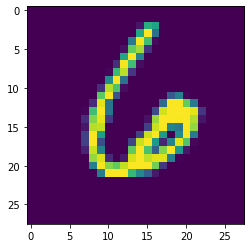

In [16]:
im=x_train[14525]
print(y_train[14525])
# tt=x_train[1010]
# print(tt.shape)
tt=im.reshape(28,-1)
# print(tt.shape)
plt.imshow(tt)
# print(tt)
pred=model.predict(im.reshape(1,784))
pred
print(f"Ans is: {np.argmax(pred)}")

In [17]:
prediction_p = tf.nn.softmax(pred)
prediction_p

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.08545891, 0.08545577, 0.08575692, 0.08545516, 0.08593447,
        0.08546869, 0.23010221, 0.08545764, 0.08545614, 0.08545422]],
      dtype=float32)>

In [18]:
# print(prediction_p)
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

Total of predictions: 1.000


In [52]:
predi=model.predict(x_test.reshape(len(x_test),784))
len(predi)

313/313 [==============================] - 0s 951us/step


10000

In [53]:
# predi[0]
y_ans=np.zeros(10000)
for i in range(10000):
    y_ans[i]=np.argmax(predi[i])
y_ans
print(len(y_test))


10000


In [54]:
y_ans

array([7., 2., 1., ..., 4., 5., 6.])

In [55]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [56]:
# print(len(y_ans))
count=0
for i in range(10000):
    if y_ans[i]!=y_test[i]:
        count=count+1
count
    

516

In [57]:
accuracy= (10000-516)*100/10000
accuracy

94.84